In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/website-traffic-analysis/traffic.csv


In [19]:
#/kaggle/input/website-traffic-analysis/traffic.csv
import kagglehub
import numpy as np
import pandas as pd

path = '/kaggle/input/website-traffic-analysis/traffic.csv'

data = pd.read_csv(path)

In [20]:
data.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [21]:
data.isnull().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

In [22]:
data['city'] = data['city'].fillna('Unknown')
data['country'] = data['country'].fillna('Unknown')
data['isrc'] = data['isrc'].fillna('Not Available')
data['artist'] = data['artist'].fillna('Unknown artist')


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226278 non-null  object
 3   city     226278 non-null  object
 4   artist   226278 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     226278 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [24]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

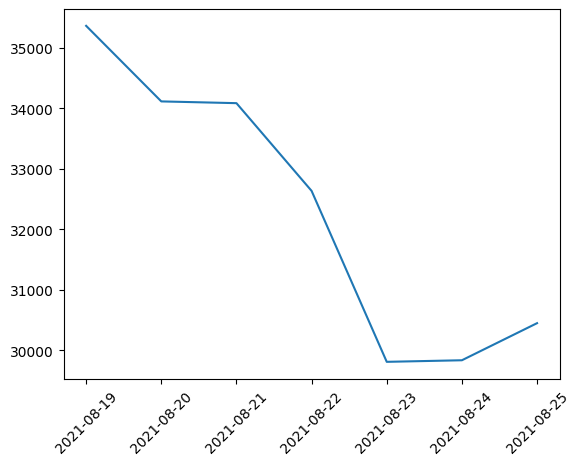

In [26]:
#Daily traffic

daily_traffic = data.groupby('date').size()
plt.plot(daily_traffic)
plt.xticks(rotation=45)
plt.show()

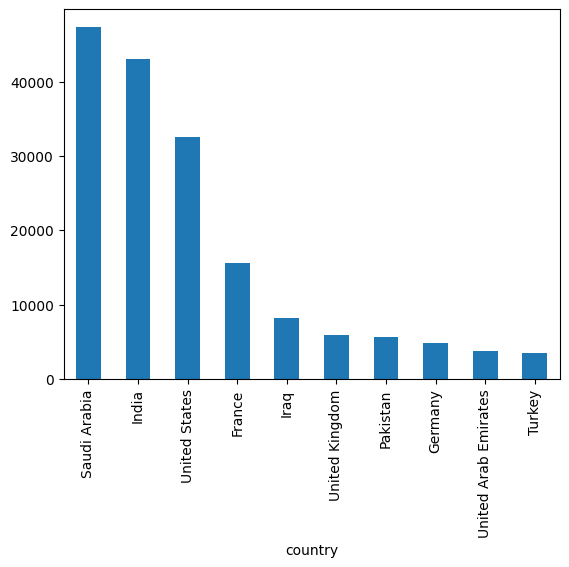

In [27]:
# Analysis of top countries
top_countries = data["country"].value_counts().head(10) 
top_countries.plot(kind="bar")
plt.xticks(rotation=90)
plt.show()

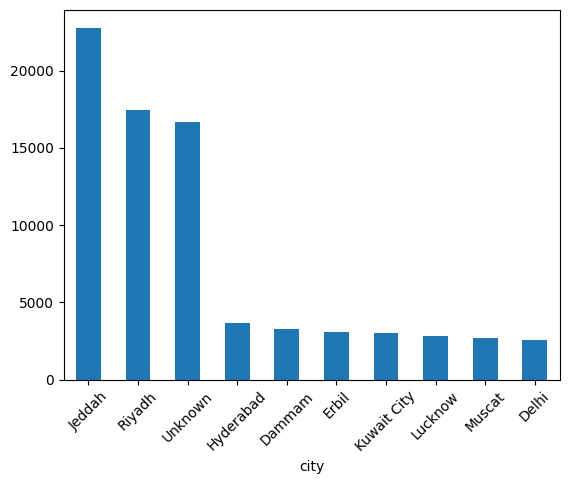

In [28]:
# Top Cities

top_cities = data["city"].value_counts().head(10) 
top_cities.plot(kind="bar")
plt.xticks(rotation=45)
plt.show()

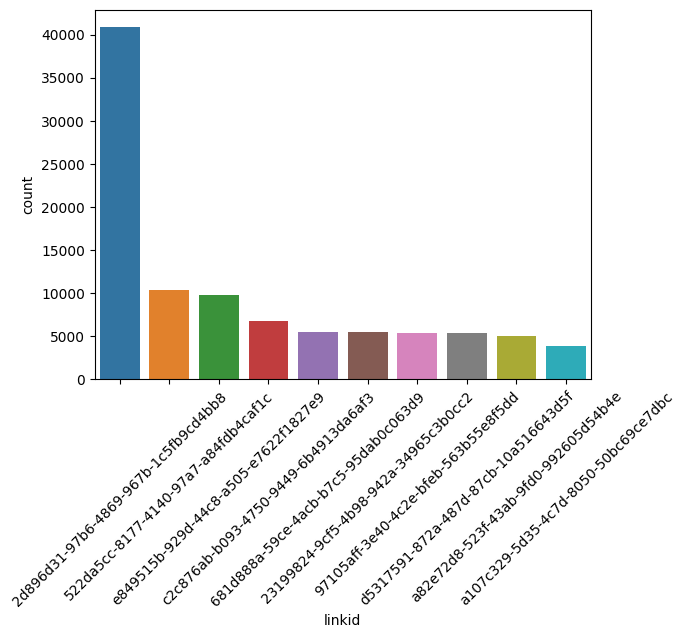

In [29]:
top_links = data["linkid"].value_counts().head(10).reset_index()
sns.barplot(x = 'linkid', y = 'count', data = top_links)
plt.xticks(rotation=45)
plt.show()

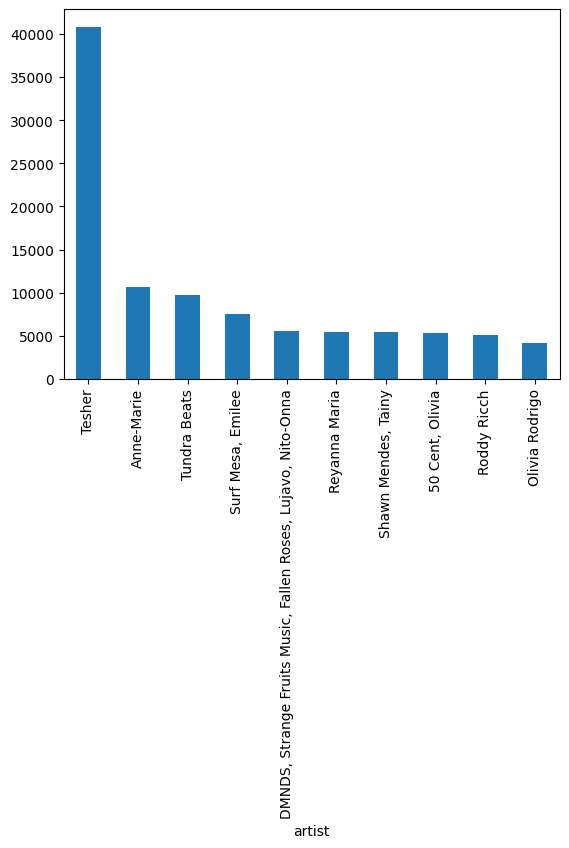

In [30]:
#Top artists

top_artists = data["artist"].value_counts().head(10) 
top_artists.plot(kind="bar")
plt.xticks(rotation=90)
plt.show()

In [37]:
# Country wise top artists

country_wise_artists = (data.groupby('country')['artist'].value_counts().reset_index(name="count"))
country_wise_artists = country_wise_artists.groupby('country').head()
country_wise_artists

,country,artist,count
0,Afghanistan,"Fat Joe, Remy Ma, French Montana, InfaRed",1
1,Afghanistan,Gagan Roy,1
2,Albania,Tesher,69
3,Albania,"50 Cent, Olivia",24
4,Albania,Roddy Ricch,23
...,...,...,...
12775,Zimbabwe,Ariana Grande,2
12776,Zimbabwe,Hiko,2
12782,Åland,Bella Poarch,4
12783,Åland,Hoàng Read,1
